In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read Data**

In [2]:
url = 'https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_2/D2.csv'

dataframe = pd.read_csv(url)

In [3]:
dataframe.head()

,Year,Sales of shampoo over a three year period
0,1,266.0
1,2,145.9
2,3,183.1
3,4,119.3
4,5,180.3


**Single Exponential Smoothing without inbuilt function**

In [4]:
alpha_array = [0.5,0.7,0.9]
gamma_array = [0.06,0.03,0.01]

**Function for single exponential smoothing**

In [5]:
def dataset_with_interval(dataset):
  s1 = dataset[0]
  b1 = (dataset[-1] - dataset[0])/(len(dataset)-1)
  forecasted_list=[]
  mse_list = []
  complete_fc_val_list=[]
  for alpha in alpha_array:
    for gamma in gamma_array:
      s = [s1]
      b = [b1]
      f = []
      for i in range(len(dataset)):
        if (i<(len(dataset)-1)):
          st = alpha*(dataset[i+1]) + ((1-alpha)*(s[i]+b[i]))
          s.append(st)       
          bt = gamma*(s[i+1]-s[i]) + (1-gamma)*b[i] 
          b.append(bt)   
          ft = st+bt
          f.append(ft)

      f.insert(0,s1)
      fc_s = f.copy()
      forecasted_list.append(f[-1])
      complete_fc_val_list.append(fc_s)

      cp_df = dataset.copy()
      cp_df = np.c_[ cp_df, f ] 
      error_array = cp_df[:,0] - cp_df[:,1]
      cp_df = np.c_[ cp_df, error_array ]
      sqer_arr = (cp_df[:,2])**2
      cp_df = np.c_[cp_df,sqer_arr]

      MSE = np.sum(cp_df[1:len(dataset),3])/(len(cp_df)-1) 
      mse_list.append(MSE)

  return mse_list,forecasted_list,complete_fc_val_list

**Different interval data array**

In [6]:
data= dataframe.values
dataset_array = [data[0::1][:,1],data[0::2][:,1],data[0::4][:,1],data[0::8][:,1],data[0::12][:,1],data[0::24][:,1]]


**Different interval time array**

In [7]:
time_array = []
for d in dataset_array:
  t = range(d.shape[0])
  time_array.append(t)

**Function call for MSE and prediction calculations**

In [8]:
final_mse_list = []
final_forecasted_list = []
final_fc_val_list = []
for df in dataset_array:
  mse_list,forecasted_list,complete_fc_val_list = dataset_with_interval(df)
  final_mse_list.append(mse_list)
  final_fc_val_list.append(complete_fc_val_list)
  final_forecasted_list.append(forecasted_list)

In [9]:
final_mse_list 

[[1603.7932912786448,
  1681.82454335517,
  1765.086781229357,
  679.5213954456245,
  731.9728929180826,
  796.2268489315576,
  120.74639795013786,
  142.46008840409044,
  183.75991341178522],
 [1768.0397595100405,
  1929.8111937264052,
  2058.0444962570846,
  663.0925782546653,
  759.8060585382217,
  859.2665095588987,
  257.32117759839593,
  297.3602777736964,
  361.503390510271],
 [5909.338268955723,
  6647.307974217917,
  7232.826837304267,
  2769.583751770978,
  3366.4485296689973,
  3849.291544549589,
  1824.339102704104,
  2252.790751946955,
  2624.3193142172618],
 [20716.43933190545,
  22108.287851728415,
  23103.427540679713,
  12240.27601360726,
  13521.708980302878,
  14452.260817424854,
  9044.644852801594,
  10049.06087647391,
  10810.319403180723],
 [3881.9121052015107,
  4037.7094252732218,
  4144.639053153781,
  2169.389943063343,
  2334.669858320101,
  2449.2979801211945,
  1219.298107447494,
  1355.4367206887614,
  1453.3963255856984],
 [5431.689999999999,
  5431.6899

In [10]:
final_forecasted_list

[[629.8251507067873,
  623.1663407523256,
  620.5125547082218,
  644.6361025229655,
  639.4322914371855,
  636.9783130985587,
  658.9635936862707,
  654.31342086984,
  651.8999758310797],
 [622.8120398524367,
  616.5464428470613,
  614.564834945061,
  632.3920199869438,
  626.3181267857956,
  623.6847050340988,
  617.05180803461,
  612.9635127529391,
  611.1530379063756],
 [603.1520893720634,
  609.1898795607078,
  614.7172345458907,
  659.8091962583566,
  660.7829076913207,
  662.8678244477915,
  713.1173844804844,
  710.9211524085803,
  710.7035347200924],
 [665.3211157319998,
  672.3109729957499,
  677.3719661857499,
  706.8583205762112,
  710.3220294739932,
  713.1940645909372,
  761.1393294772032,
  760.9186412573054,
  761.4065643500893],
 [346.253695,
  347.80867375,
  348.87246374999995,
  351.2105221999999,
  352.4346405499999,
  353.30390895,
  365.9246918,
  366.27346295,
  366.59390255],
 [413.4, 413.4, 413.4, 413.4, 413.4, 413.4, 413.4, 413.4, 413.4]]

In [11]:
min_idx=[]
for minval in final_mse_list: 
  minidx = minval.index(min(minval))
  min_idx.append(minidx)

In [12]:
interval_arr = [1,2,4,8,12,24]

**Plotting function for predicted values ad actual values**

In [13]:
def plotting_function(fc_val,data_val,time_val,interval_val):
  fig = plt.gcf()
  plt.plot(time_val,data_val,color='g',label='Original')
  plt.plot(time_val,fc_val,color='r',label='Forcasted')
  fig.set_size_inches(12,8)
  plt.legend()
  plt.xlabel('Time(in months)')
  plt.ylabel('Sales of shampoo over a three year period')
  plt.title('Prediction at '+str(interval_val)+' month interval at the least MSE')
  plt.figure()
  plt.close

**Plotting of predicted values and actual values for different intervals**

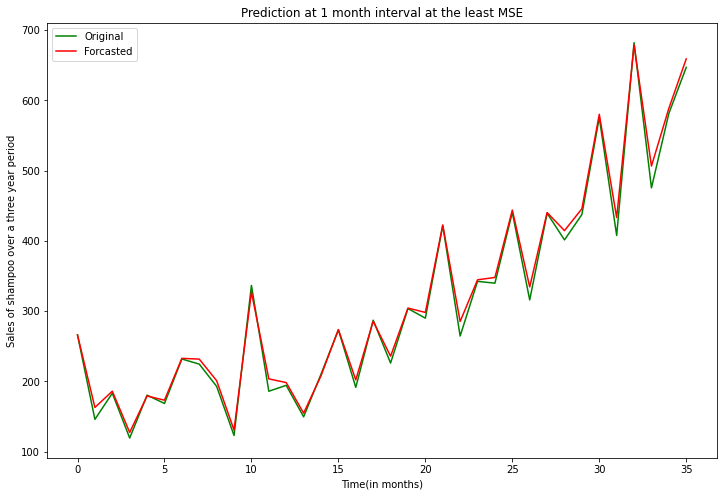

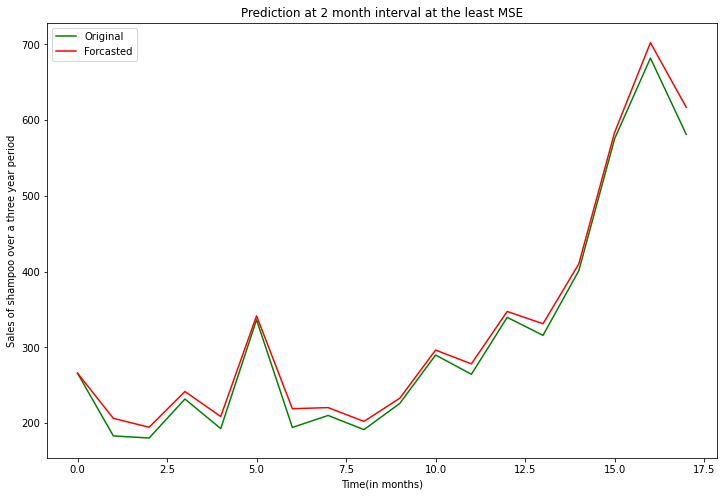

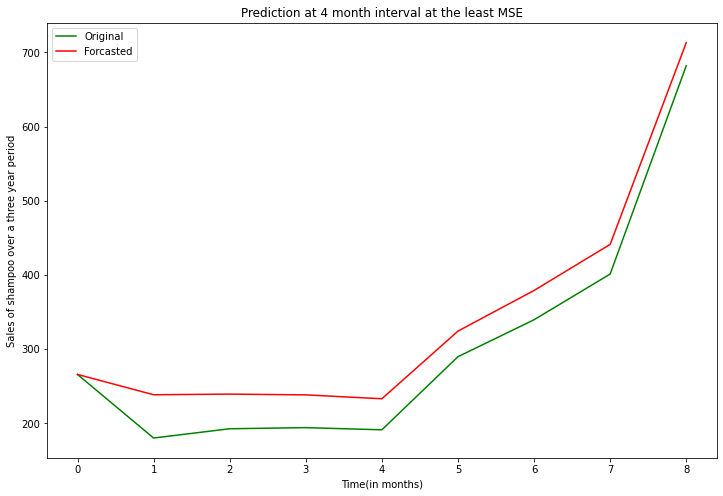

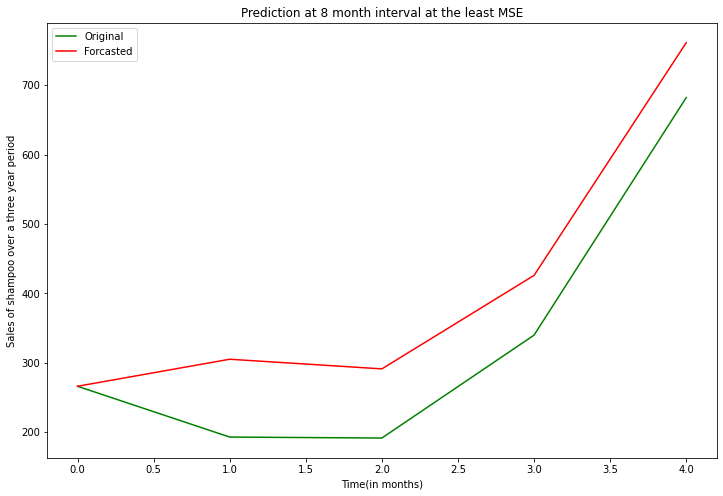

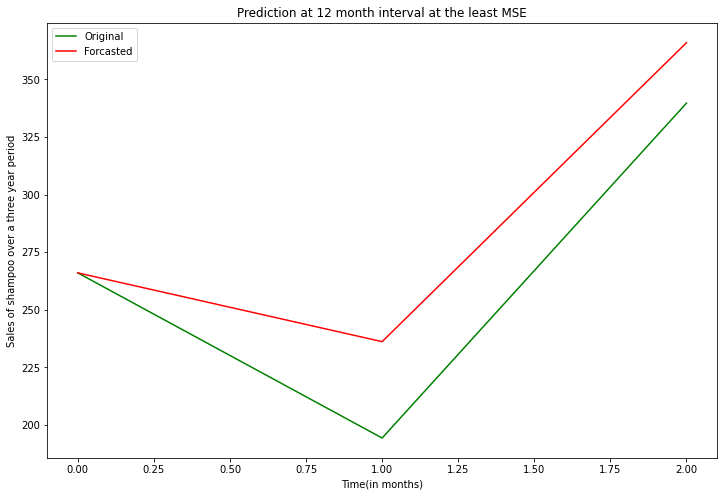

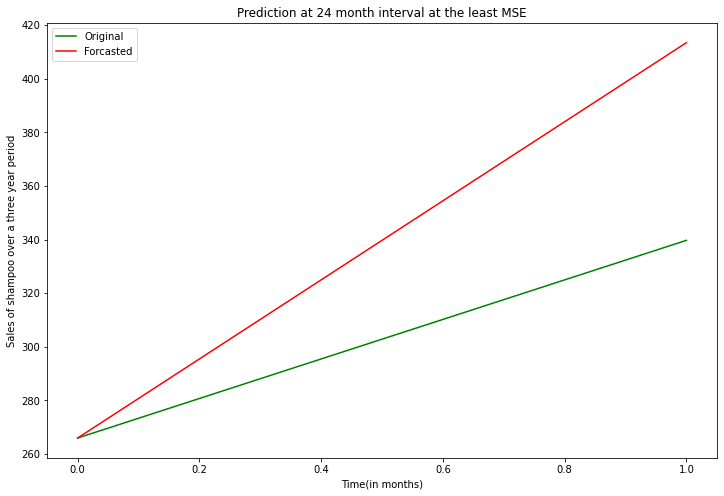

<Figure size 432x288 with 0 Axes>

In [14]:
for fc_idx in range(6):
  plotting_function(final_fc_val_list[fc_idx][min_idx[fc_idx]],dataset_array[fc_idx],time_array[fc_idx],interval_arr[fc_idx])  

**Table of Least MSE value for each interval**

In [15]:
from tabulate import tabulate

tab_array = []
for n in range(6):
  tab = [(interval_arr[n]),final_mse_list[n][min_idx[n]]]
  tab_array.append(tab)

table = tabulate(tab_array, headers=['interval(in hours)', 'Least MSE'], tablefmt='orgtbl')

print(table)

|   interval(in hours) |   Least MSE |
|----------------------+-------------|
|                    1 |     120.746 |
|                    2 |     257.321 |
|                    4 |    1824.34  |
|                    8 |    9044.64  |
|                   12 |    1219.3   |
|                   24 |    5431.69  |


**Plotting of MSE at different intervals**

In [16]:

def mse_plotting_func(inter_val,mseval):
  fig = plt.gcf()
  ax = fig.add_axes([0,0,1,1])
  rects = ax.bar(inter_val,round(mseval,2),color='b')
  for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') 
  fig.set_size_inches(12,8)
  plt.xlabel('Interval(in months)')
  plt.ylabel('MSE')
  plt.title('MSE VS Interval')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


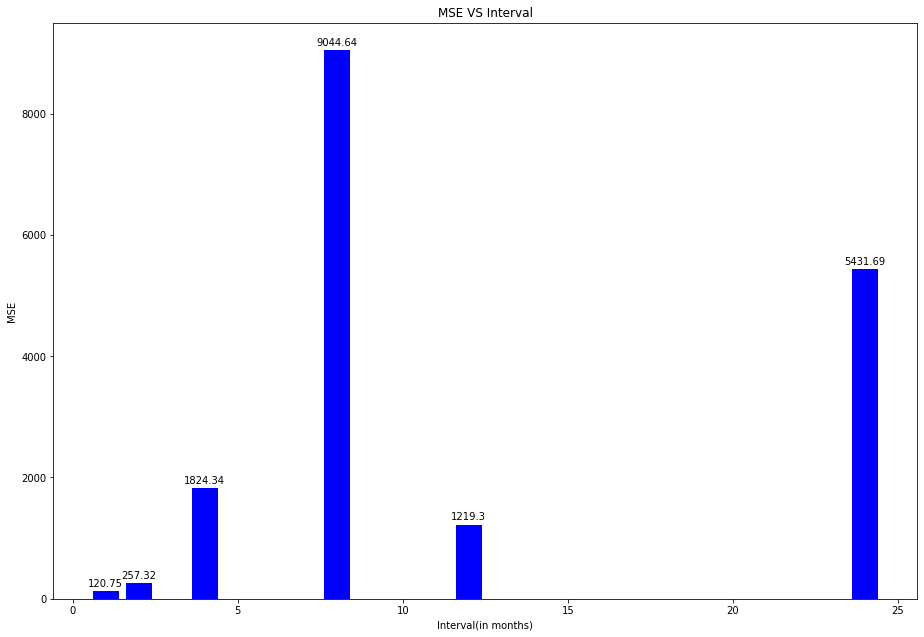

In [17]:
for idx in range(6):
  mse_plotting_func(interval_arr[idx],final_mse_list[idx][min_idx[idx]])

**Comparing forecasted values with inbuilt function**

In [19]:
from sklearn.metrics import mean_squared_error

model = Holt(dataframe['Sales of shampoo over a three year period'])

dataframe['pred_val'] = model.fit(smoothing_level=0.9,smoothing_slope=.01,optimized=False).fittedvalues.shift(0)
MSE = mean_squared_error(dataframe.pred_val.dropna(),dataframe['Sales of shampoo over a three year period'])

In [20]:
print('MSE (inbuilt function): ',MSE)
print('MSE (own function): ',final_mse_list[0][min_idx[0]])

MSE (inbuilt function):  24936.10762553721
MSE (own function):  120.74639795013786


In [21]:
print('Difference in error: ',final_mse_list[0][min_idx[0]]-MSE)

Difference in error:  -24815.361227587073
